### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
#get build/manipulated dataset from csv file
df=pd.read_csv('data.csv')

In [3]:
df

,Account_Number,Zip Code,Total_Mortgage_Balances,Total_HE_Balances,Num_Trades_Past_Due,Num_HE_Trades,FICO_Score_Original,Loan Period,Origination_Date,Maturity_Date,...,m5_Day_Past_Due,m5_APR,m5_Deliqunecy,m6_FICO_Score_Current,m6_Commitments,m6_Outstandings,m6_LTV_Current,m6_Day_Past_Due,m6_APR,m6_Deliqunecy
0,1,98104.0,0,0,NaN,0,0,7165,11/18/1996,7/1/2016,...,365.0,0.0000,1.0,0,0.00,0.00,0.000,404,0.0000,1
1,2,44145.0,0,0,NaN,0,0,2557,4/29/1998,4/29/2005,...,5143.0,0.0000,1.0,0,0.00,0.00,0.000,5281,0.0000,1
2,3,97402.0,0,0,NaN,0,0,2555,2/7/1996,2/5/2003,...,6453.0,0.0000,1.0,0,0.00,0.00,0.000,6820,0.0000,1
3,4,98003.0,0,0,NaN,0,0,1834,7/8/1996,7/16/2001,...,6697.0,0.0000,1.0,0,0.00,0.00,0.000,6521,0.0000,1
4,5,NaN,0,0,NaN,0,0,7314,9/23/2000,10/2/2020,...,236.0,0.0000,1.0,0,15016.98,13382.57,0.000,260,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,45840.0,0,13107,93.0,2,818,2571,7/24/2012,8/8/2019,...,0.0,0.0377,0.0,735,1326.59,1250.06,0.015,0,0.0401,0
4996,4997,46052.0,18691,23091,93.0,1,735,5493,8/7/2012,8/22/2027,...,0.0,0.0435,0.0,792,21354.23,21799.11,0.208,0,0.0418,0
4997,4998,46017.0,0,81498,1.0,2,732,10972,7/24/2012,8/8/2042,...,0.0,0.0534,0.0,564,85939.84,80981.77,0.925,0,0.0561,0
4998,4999,48162.0,0,133829,93.0,3,840,10972,7/24/2012,8/8/2042,...,0.0,0.0393,0.0,648,131862.58,131862.58,0.566,0,0.0397,0


In [4]:
df.dtypes

Account_Number               int64
Zip Code                   float64
Total_Mortgage_Balances      int64
Total_HE_Balances            int64
Num_Trades_Past_Due        float64
Num_HE_Trades                int64
FICO_Score_Original          int64
Loan Period                  int64
Origination_Date            object
Maturity_Date               object
LTV_Original               float64
Lien_Position                int64
Origination_DTI            float64
m1_FICO_Score_Current      float64
m1_Commitments             float64
m1_Outstandings            float64
m1_LTV_Current             float64
m1_Day_Past_Due            float64
m1_APR                     float64
m1_Deliqunecy              float64
m2_FICO_Score_Current      float64
m2_Commitments             float64
m2_Outstandings            float64
m2_LTV_Current             float64
m2_Day_Past_Due            float64
m2_APR                     float64
m2_Deliqunecy              float64
m3_FICO_Score_Current      float64
m3_Commitments      

### MISSING DATA HANDLING

In [5]:
df.shape


(5000, 55)

In [6]:
(df.isna().sum())/len(df)

Account_Number             0.0000
Zip Code                   0.3866
Total_Mortgage_Balances    0.0000
Total_HE_Balances          0.0000
Num_Trades_Past_Due        0.5266
Num_HE_Trades              0.0000
FICO_Score_Original        0.0000
Loan Period                0.0000
Origination_Date           0.0000
Maturity_Date              0.0000
LTV_Original               0.0000
Lien_Position              0.0000
Origination_DTI            0.0000
m1_FICO_Score_Current      0.0016
m1_Commitments             0.0016
m1_Outstandings            0.0016
m1_LTV_Current             0.0016
m1_Day_Past_Due            0.0016
m1_APR                     0.0016
m1_Deliqunecy              0.0016
m2_FICO_Score_Current      0.0014
m2_Commitments             0.0014
m2_Outstandings            0.0014
m2_LTV_Current             0.0014
m2_Day_Past_Due            0.0014
m2_APR                     0.0014
m2_Deliqunecy              0.0014
m3_FICO_Score_Current      0.0012
m3_Commitments             0.0012
m3_Outstanding

Lets remove both:
Zip Code and Lien_Position: Likely not much predictive power from intitial research   AND  
Num_Trades_Past_Due: about 50% data availiable

In [7]:
df = df.drop(['Zip Code', 'Num_Trades_Past_Due', 'Lien_Position', 'Origination_Date', 'Maturity_Date', 'm6_Day_Past_Due'], axis=1)

Methods to fill the missing values: 

Categorical Variable:imputation using mode

Numerical Methods:imputation using mean or median

In [8]:
#Fill the Missing Values with 0 as it is the most common mode for all m1-m6 rows
df[(df['m1_FICO_Score_Current'].isna())]

,Account_Number,Total_Mortgage_Balances,Total_HE_Balances,Num_HE_Trades,FICO_Score_Original,Loan Period,LTV_Original,Origination_DTI,m1_FICO_Score_Current,m1_Commitments,...,m5_LTV_Current,m5_Day_Past_Due,m5_APR,m5_Deliqunecy,m6_FICO_Score_Current,m6_Commitments,m6_Outstandings,m6_LTV_Current,m6_APR,m6_Deliqunecy
627,628,0,0,0,0,1667,0.089,0.000,NaN,NaN,...,0.0,0.0,0.0000,0.0,0,0.00,0.00,0.0,0.0000,0
689,690,0,0,0,0,3652,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,0,357489.54,368108.04,0.0,0.0000,0
1963,1964,0,0,0,597,5499,0.167,0.303,NaN,NaN,...,0.0,0.0,0.0973,0.0,0,0.00,0.00,0.0,0.0993,0
2054,2055,0,0,0,749,7350,0.518,0.190,NaN,NaN,...,0.0,0.0,0.0859,0.0,0,0.00,0.00,0.0,0.0833,0
2064,2065,0,0,0,689,7736,0.809,0.459,NaN,NaN,...,0.0,0.0,0.0572,0.0,0,0.00,0.00,0.0,0.0567,0
2434,2435,0,0,0,612,7350,0.833,0.486,NaN,NaN,...,0.0,0.0,0.0881,0.0,0,0.00,0.00,0.0,0.0935,0
2450,2451,0,0,0,714,7321,0.841,0.414,NaN,NaN,...,0.0,0.0,0.0640,0.0,0,0.00,0.00,0.0,0.0681,0
2746,2747,0,0,0,770,5498,0.842,0.402,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0.00,0.00,0.0,0.0791,0


In [9]:
df.fillna(0,inplace=True)

For saving time, we will not treat outliers

### EDA

TARGET VARIBLE: m6_Deliqunecy, iT IS A CATEGORICAL VARIABLE. Lets look at frequiency table, percentage dist and bar plot

In [10]:
df.m6_Deliqunecy.value_counts()

0    4497
1     503
Name: m6_Deliqunecy, dtype: int64

In [11]:
#Normalize can be set to true to print proportions
df.m6_Deliqunecy.value_counts(normalize=True)

0    0.8994
1    0.1006
Name: m6_Deliqunecy, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

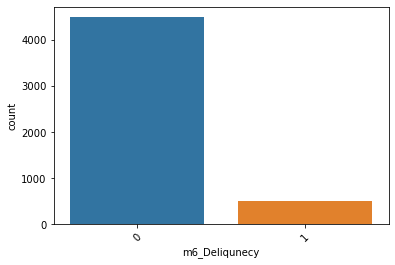

In [12]:
sns.countplot(x="m6_Deliqunecy", data=df)
plt.xticks(rotation =45)

Lets visualize each variable seprately. We have categorical, ordinal, and numerical data

Numerical

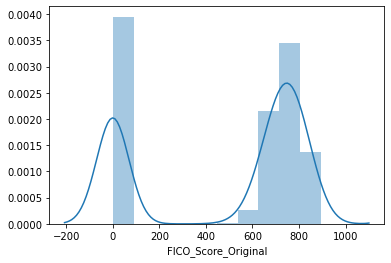

In [13]:
sns.distplot(df['FICO_Score_Original'])

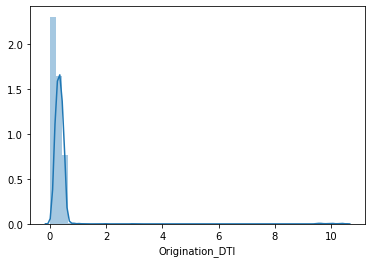

In [14]:
sns.distplot(df['Origination_DTI'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


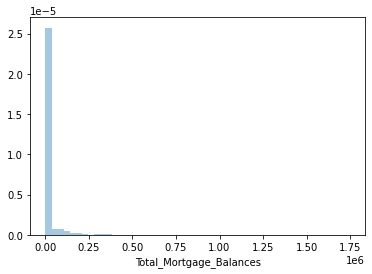

In [15]:
sns.distplot(df['Total_Mortgage_Balances'])

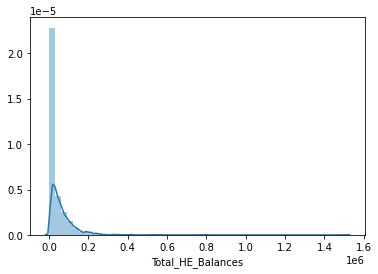

In [16]:
sns.distplot(df['Total_HE_Balances'])

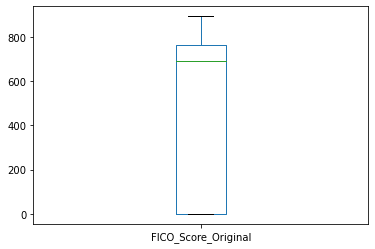

In [17]:
df['FICO_Score_Original'].plot.box()

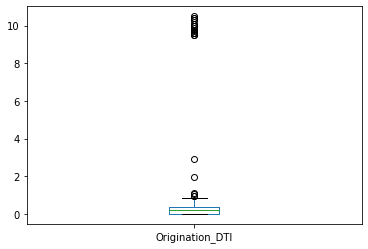

In [18]:
df['Origination_DTI'].plot.box()

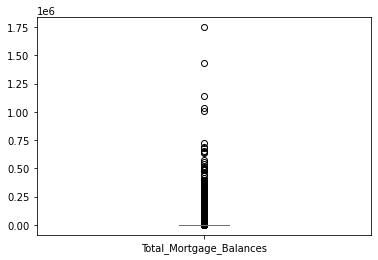

In [19]:
df['Total_Mortgage_Balances'].plot.box()

pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.

In [20]:
pd.set_option('display.max_rows', None)
pd.crosstab(df['FICO_Score_Original'],df.m6_Deliqunecy,normalize='index')

m6_Deliqunecy,0,1
FICO_Score_Original,,
0,0.893931,0.106069
485,1.000000,0.000000
488,1.000000,0.000000
496,1.000000,0.000000
510,1.000000,0.000000
515,0.000000,1.000000
519,1.000000,0.000000
522,0.666667,0.333333
532,1.000000,0.000000


In [21]:
pd.set_option('display.max_rows', None)
pd.crosstab(df['m6_FICO_Score_Current'],df.m6_Deliqunecy,normalize='index')

m6_Deliqunecy,0,1
m6_FICO_Score_Current,,
0,0.798611,0.201389
430,0.000000,1.000000
435,0.000000,1.000000
437,0.000000,1.000000
453,1.000000,0.000000
462,1.000000,0.000000
464,0.000000,1.000000
477,1.000000,0.000000
479,1.000000,0.000000


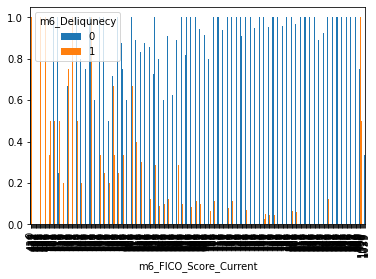

In [22]:
pd.crosstab(df['m6_FICO_Score_Current'],df.m6_Deliqunecy,normalize='index').plot(kind='bar')

In [ ]:
pd.crosstab(df['m6_FICO_Score_Current'],df.m6_Deliqunecy,normalize='index').plot(kind='bar')

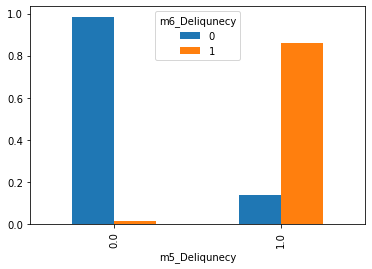

In [762]:
pd.crosstab(df.m5_Deliqunecy,df.m6_Deliqunecy,normalize='index').plot(kind='bar')

Insights: higher fico score leads to less loan deliquency, Also if you were deliquent in prevois month, you are very likely to be deliquent the next month. Oppisite cannot be extacly true as you have to be non-deliquent once to be deliquent

Correlation plot

In [763]:
#cor = df.corr()
#plt.figure(figsize=(100,600))
#sns.heatmap(cor,cmap='Set1',annot=True)

### CREATE TRAINING AND TEST DATA

In [764]:
X = df.drop('m6_Deliqunecy',1)
y = df.m6_Deliqunecy # define the target variable (dependent variable) as y

###                    Over-sampling using SMOTE

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

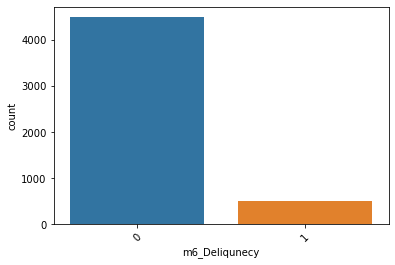

In [765]:
sns.countplot(x="m6_Deliqunecy", data=df)
plt.xticks(rotation =45)

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [766]:
from imblearn.over_sampling import SMOTE

Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [767]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['m6_Deliqunecy'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['m6_Deliqunecy']==0]))
print("Number of subscription",len(os_data_y[os_data_y['m6_Deliqunecy']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['m6_Deliqunecy']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['m6_Deliqunecy']==1])/len(os_data_X))

length of oversampled data is  7180
Number of no subscription in oversampled data 3590
Number of subscription 3590
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

## MODEL 1: LOGISTIC REGRESSION

LOGISTIC REGREESSION IS A PRIMARY BINARY CLASSIFICATION ALGORTHIM. OUR BINARY OUTCOME IS m6_deliquncy if 1 is delquient and 0 is not deliquent. IT IS A ESTIMATION OF LOGIT FUNCTION. LOGIT FINCTION IS SIMOLY A LOG OF ODDS IN FAVOR OF EVENT. CREATES A S-SPAHED CURVE WITH PROBALITY ESIMATE

USE SCIKIT LEARN FOR USING DIFFRENT MODELS IN PYTHON

In [768]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import accuracy_score, roc_auc_score

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [769]:
X_train_scaled = preprocessing.scale(os_data_X)

In [770]:
model = LogisticRegression(C=1.0, max_iter=10000)
model.fit(X_train_scaled, os_data_y.values.ravel())

LogisticRegression(max_iter=10000)

In [771]:
pred_cv = model.predict(X_test)
pred_cv2 = model.predict(X_train_scaled)

In [772]:
accuracy_score(y_test, pred_cv)

0.787

In [773]:
accuracy_score(os_data_y, pred_cv2)

0.9605849582172702

In [774]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_cv))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       907
           1       0.08      0.13      0.10        93

    accuracy                           0.79      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.83      0.79      0.81      1000



#### Feature Importance

In [779]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[1:49]]).T, model.coef_.T[1:49])), columns=['feature', 'importance'])

In [780]:
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])

In [781]:
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
43,m6_Commitments,3.471324
41,m5_Deliqunecy,2.464197
19,m2_APR,2.330957
28,m4_FICO_Score_Current,1.867328
17,m2_LTV_Current,1.150302
44,m6_Outstandings,1.094964
20,m2_Deliqunecy,0.775349
34,m4_Deliqunecy,0.770437
23,m3_Outstandings,0.728402
27,m3_Deliqunecy,0.661913


## Check Robustness of model to unseen data

In [694]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

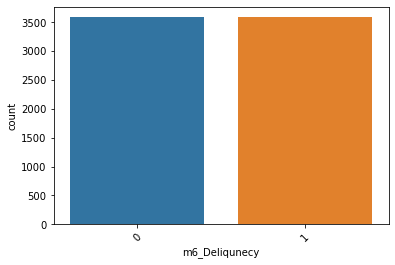

In [695]:
sns.countplot(x="m6_Deliqunecy", data=os_data_y)
plt.xticks(rotation =45)

I will use k-fold cross validation with stratification (rearranging data-> similar to bootstrapping)

In [696]:
#5 folds
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
pred_test_full = 0
cv_score =[]
accu_score=[]
i=1

for train_index,test_index in kf.split(os_data_X,os_data_y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    
    xtr = preprocessing.scale(os_data_X.loc[train_index])
    xvl = preprocessing.scale(os_data_X.loc[test_index])
    ytr,yvl = os_data_y.loc[train_index].values.ravel(),os_data_y.loc[test_index].values.ravel()
    
    #model
    kmodel = LogisticRegression(C=1.0, max_iter=10000, random_state=1)
    kmodel.fit(xtr,ytr)
    pred_test=kmodel.predict(xvl)
    
    score = accuracy_score(yvl,pred_test)
    score2 = roc_auc_score(yvl,pred_test)
    print('ROC AUC score:',score2)
    print('Accuracy score:',score)
    print('\n')
    
    accu_score.append(score) 
    cv_score.append(score2)
    
    pred_test = kmodel.predict(X_test_scaled)
    pred = kmodel.predict_proba(xvl)[:,1]
    i+=1
    

1 of KFold 5
ROC AUC score: 0.9505571030640669
Accuracy score: 0.9505571030640668


2 of KFold 5
ROC AUC score: 0.9532862864846176
Accuracy score: 0.9533101045296167


3 of KFold 5
ROC AUC score: 0.9560873416393748
Accuracy score: 0.9560975609756097


4 of KFold 5
ROC AUC score: 0.9616826532713294
Accuracy score: 0.9616724738675958


5 of KFold 5
ROC AUC score: 0.9609911306395029
Accuracy score: 0.9609756097560975




In [715]:
#Mean Validation Score
from statistics import mean 
mean(accu_score)

0.9565225704385973

In [716]:
print('Confusion matrix\n',confusion_matrix(yvl,kmodel.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[705  12]
 [ 44 674]]
Cv [0.9505571030640669, 0.9532862864846176, 0.9560873416393748, 0.9616826532713294, 0.9609911306395029] 
Mean cv Score 0.9565209030197783


In [717]:
kmodel.coef_

array([[ 0.05898033,  0.09948686, -0.01061503, -0.05586233,  0.02746174,
         0.15903444, -0.48574345,  0.09243549,  0.29706732, -1.19631926,
         1.20729797, -0.38131689, -0.97749614,  0.11068888,  0.73982201,
        -0.61421814, -0.54926682, -0.51404627,  0.62239508, -1.161179  ,
         0.97707808,  0.75814265, -1.21782968, -0.64910684,  0.73143771,
         0.73148914, -1.47903908, -0.10828306,  0.4850744 ,  0.96826755,
        -0.0633885 , -0.49707764, -0.72802894, -1.66647066,  0.55012623,
         0.52447505,  0.92613152, -0.19545256,  1.17727112, -0.58886301,
        -1.47954478, -2.25001431,  2.08596587, -0.75244437,  1.19607546,
        -0.89703458,  0.61767709,  7.99053669,  0.93111744]])

In [718]:
kmodel.score(xvl,yvl)

0.9609756097560975

## Reciever Operating Characteristics

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Text(0.5, 0, 'False positive rate')

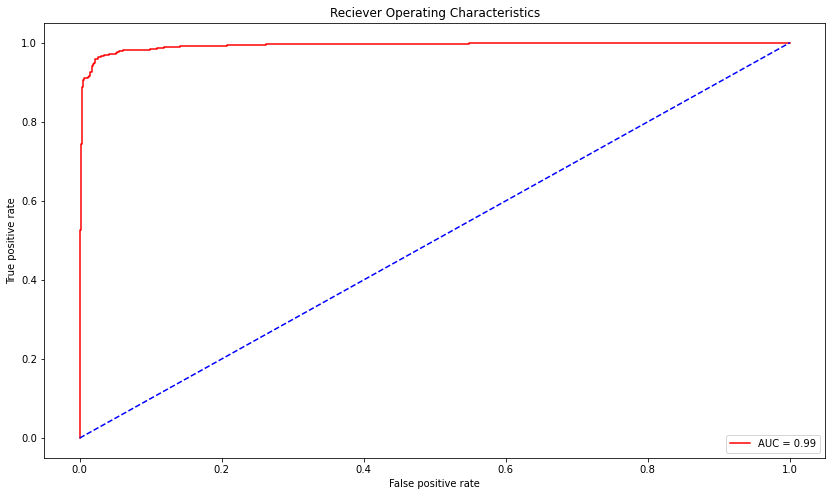

In [701]:
frp,trp, threshold = roc_curve(yvl,pred)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')